In [19]:
#Generating entanglement

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

qr = QuantumRegister(2, 'q')  #two qubit quantum register
cr = ClassicalRegister(2, 'c') #two qubit classical register

circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])  #apply Hadamard gate to the first qubit
circuit.cx(qr[0], qr[1])  #apply control x gate, qubit 0 is control and qubit 1 is the target
circuit.measure(qr, cr)  #measure the output
circuit.draw()  #draw the circuit


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

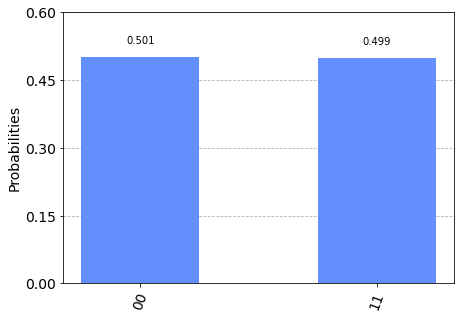

In [21]:
simulator = Aer.get_backend('qasm_simulator')  #using QASM simulator to simulate the result
execute(circuit, backend = simulator)  #submit quantum circuit to backend
result = execute(circuit, backend = simulator).result()  #storing result after simulation
plot_histogram(result.get_counts(circuit))  #histogram plot for the result